In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 행(row) 다 보기
pd.set_option('display.max_rows', None)

# 열(column) 다 보기
pd.set_option('display.max_columns', None)

### 고점 - 저별점 판별

- 이동평균선(MA)
    + 단기 MA > 장기 MA → 상승 추세
    + 단기 MA < 장기 MA → 하락 추세

- (Relative Strength Index)
	+ 70 이상 → 최근 14일 상승 강도 강함 -> 과매수 (고점 가능성)
	+ 30 이하 → 최근 14일 하락 강도 강함 -> 과매도 (저점 가능성)

✅ 대응 전략 (ETF 기준)

1️⃣ 단기 분할 매도 or 일부 이익 실현
	•	RSI가 70 이상일 때는 단기 과열이라,
👉 일정 비중(예: 10~20%)을 현금화하거나
👉 금, 단기채, 달러 ETF로 일부 이동하는 전략이 좋아요.

2️⃣ 이평선 크로스 확인
	•	20일선이 60일선을 하향 이탈할 때 (데드크로스)
→ 추세 반전 신호로 인식, 본격적 비중 축소 고려.
	•	아직 골든크로스 상태면 보유는 유지하되
→ RSI나 모멘텀 하락 시점에 점진적으로 조정.

3️⃣ 거래량 / 변동성 확인
	•	상승 중 거래량이 줄면 → “수급 피로”, 단기 고점 가능성.
	•	변동성 (예: 볼린저밴드 폭) 확대되면 → “단기 과열 매도 압력” 증가.

배당수익률: 0.01
PER: None
PBR: None


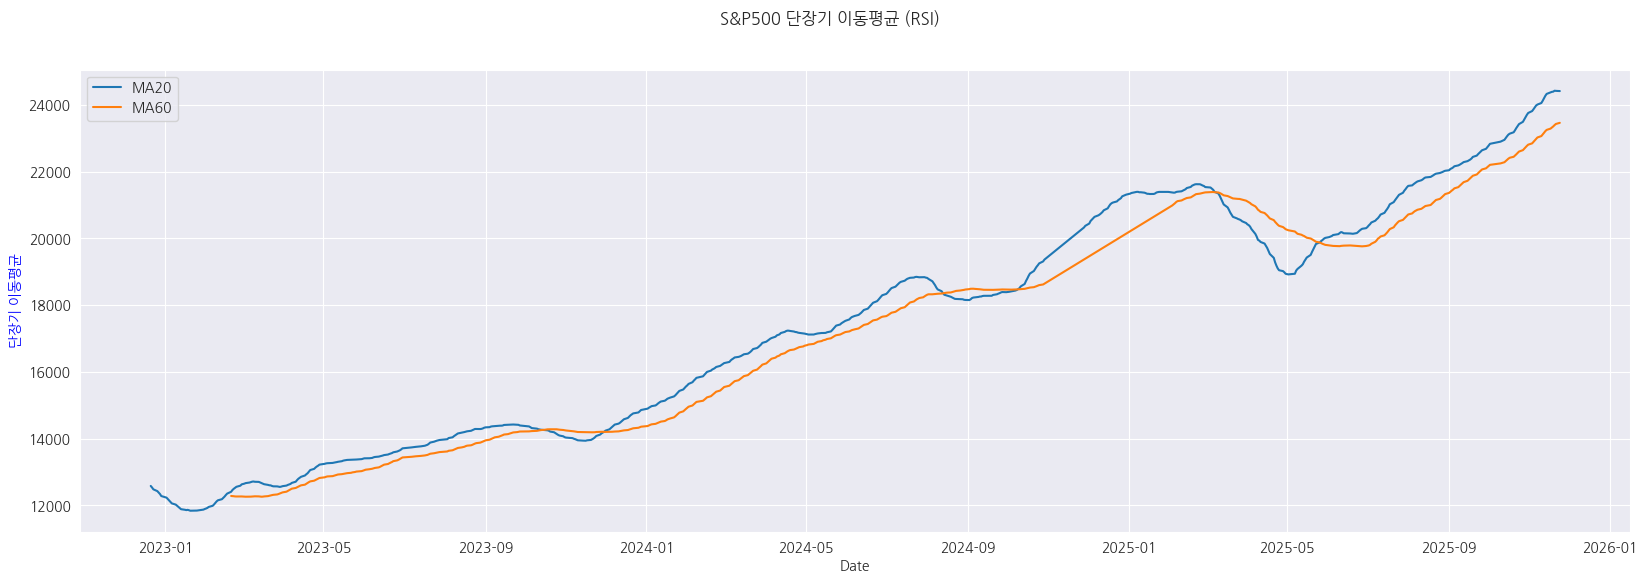

배당수익률: 0.01
PER: None
PBR: None


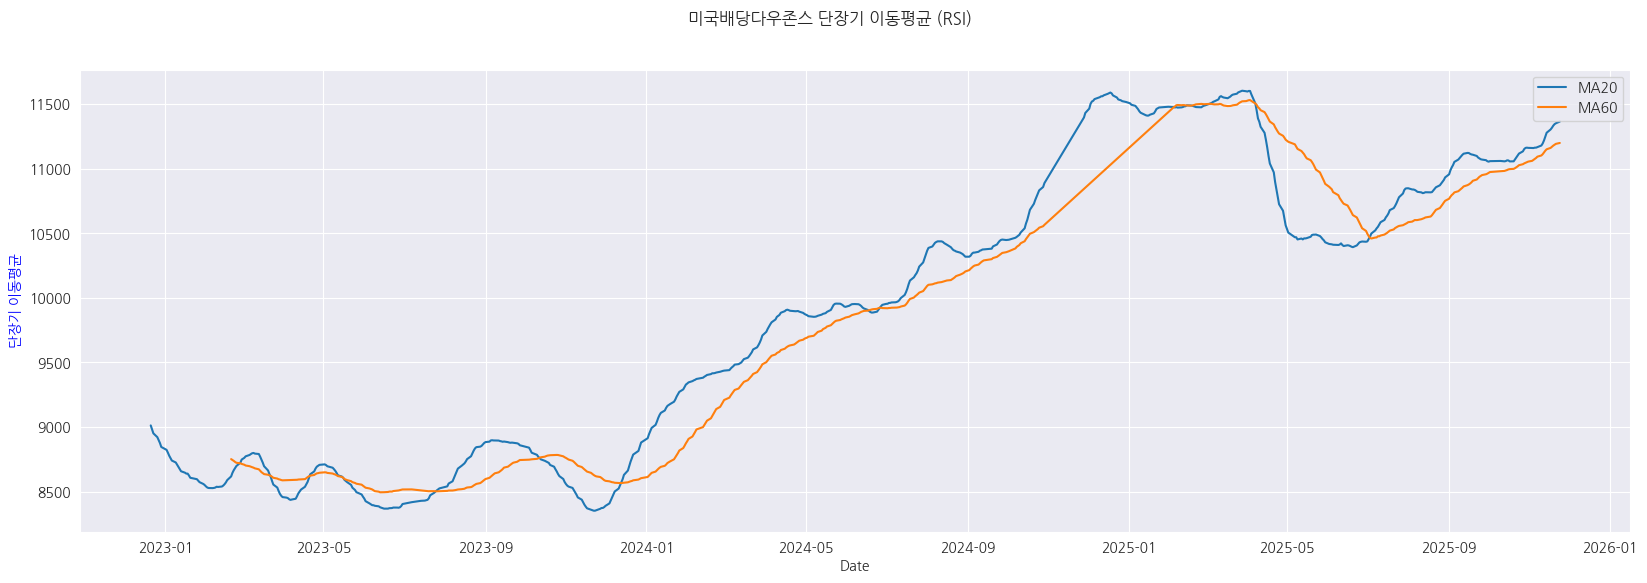

배당수익률: 0.01
PER: None
PBR: None


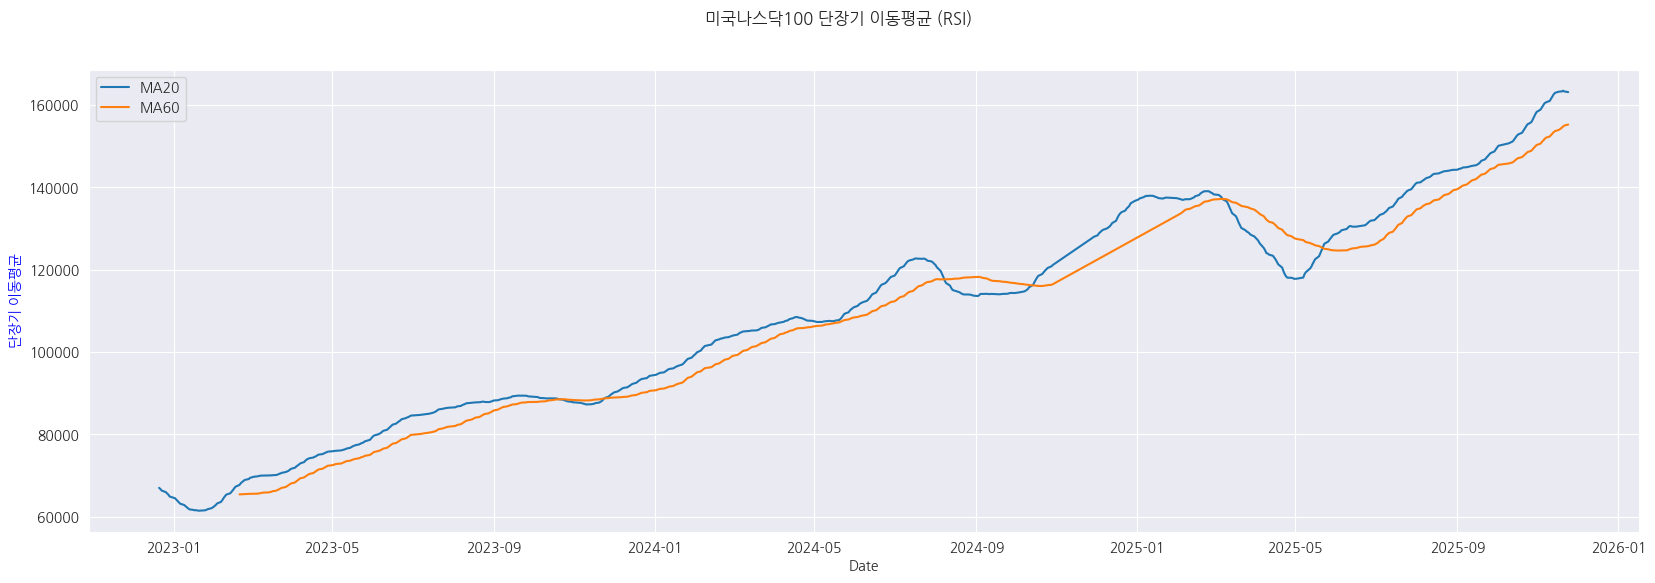

배당수익률: 0.0
PER: None
PBR: None


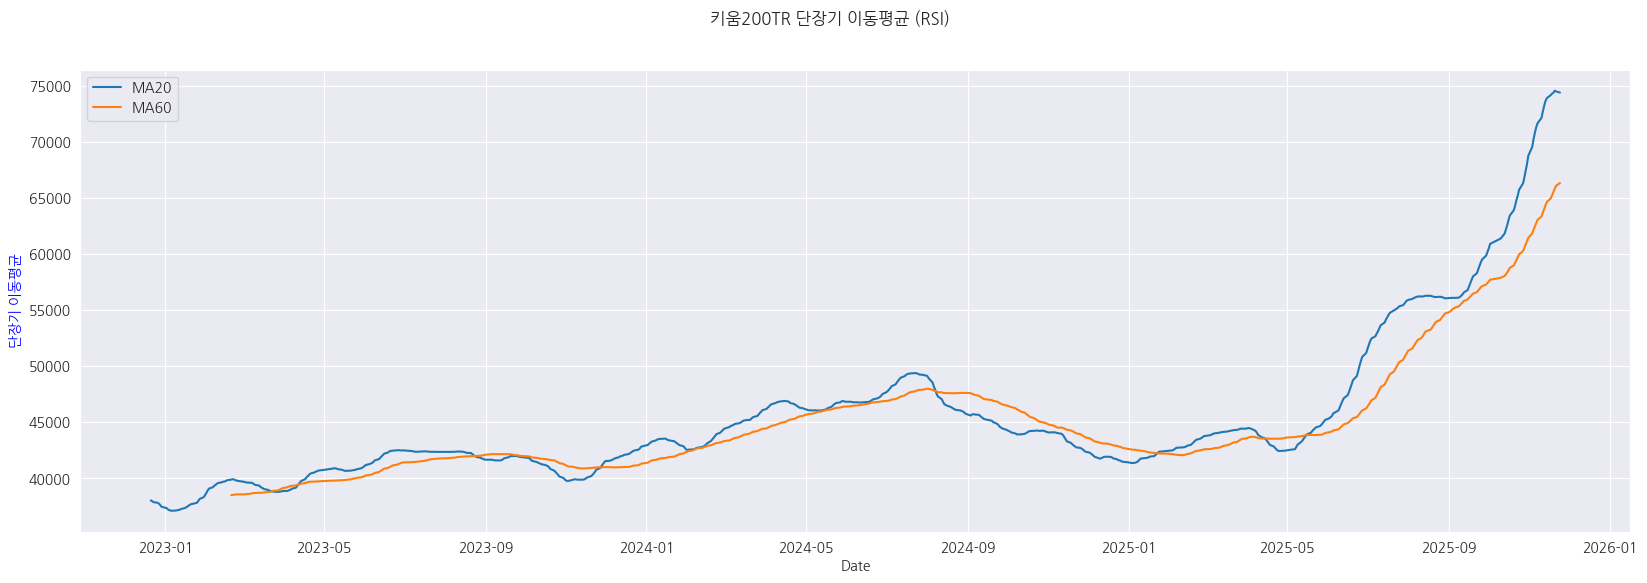

배당수익률: 0.01
PER: None
PBR: None


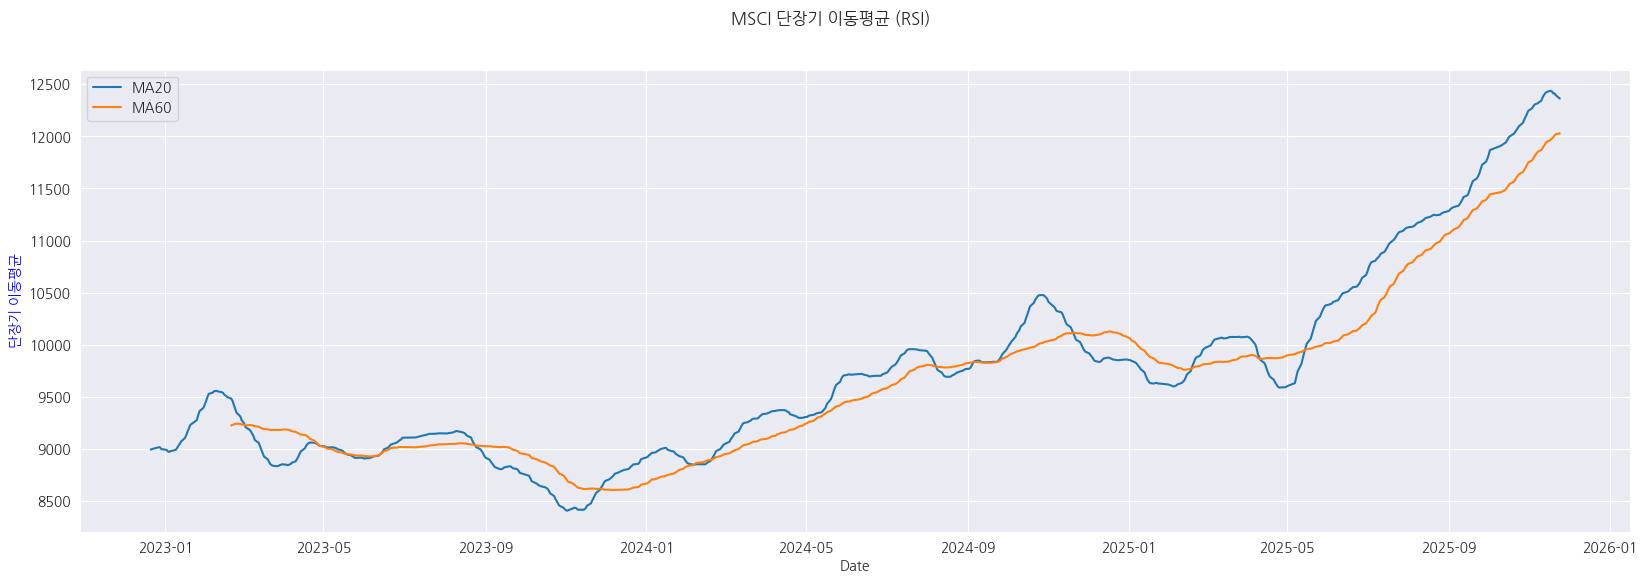

배당수익률: 0.05
PER: None
PBR: None


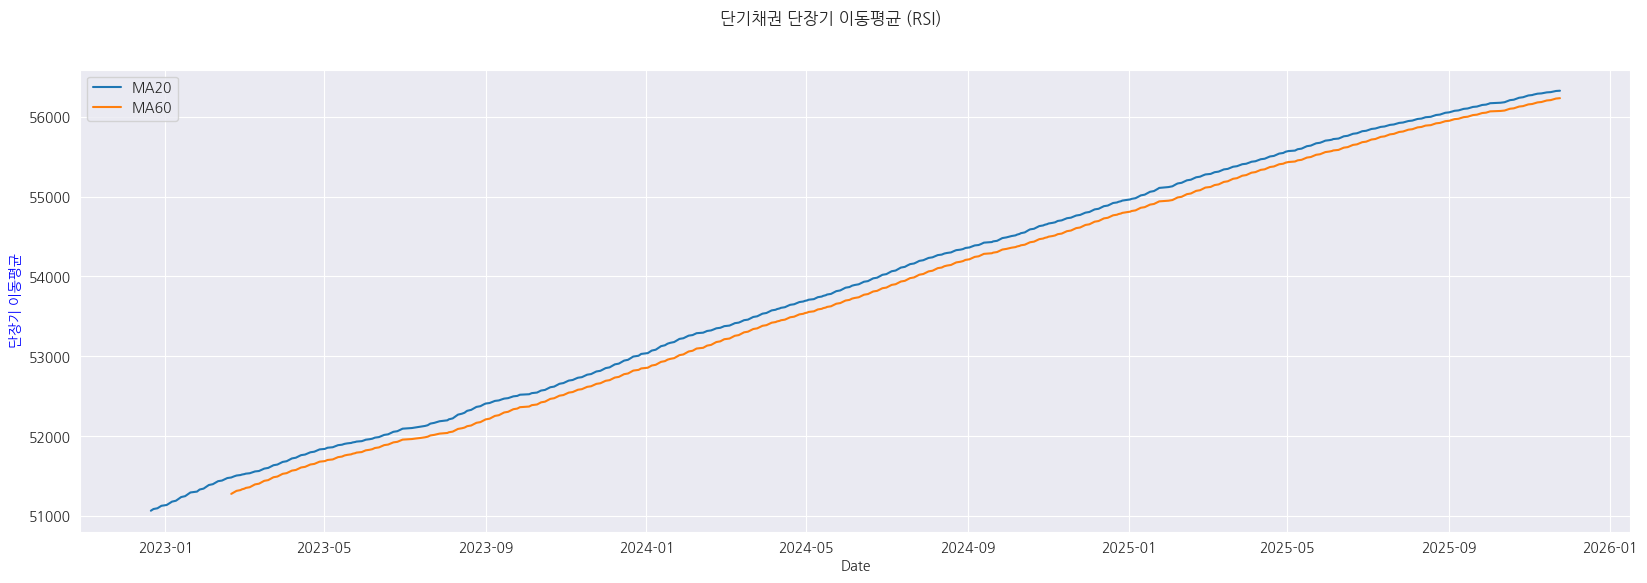

배당수익률: 0.01
PER: None
PBR: None


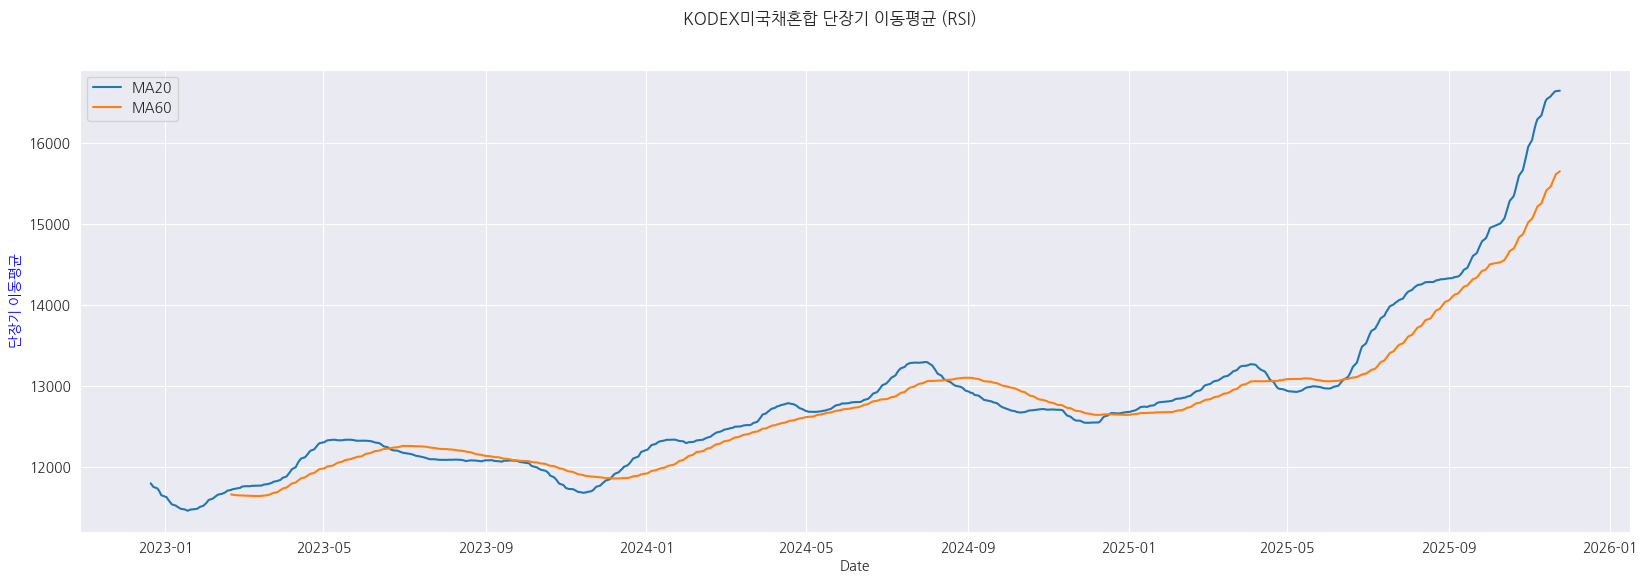

배당수익률: 0.01
PER: None
PBR: None


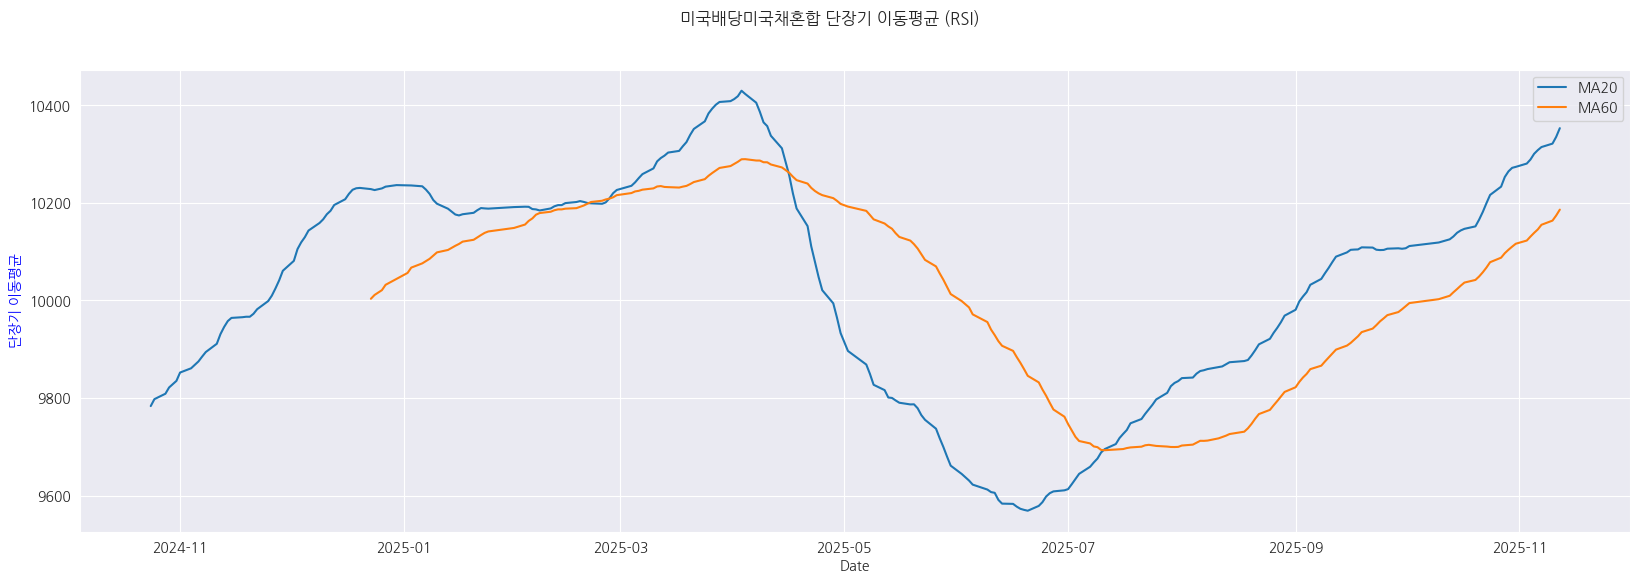

배당수익률: 0.1
PER: None
PBR: None


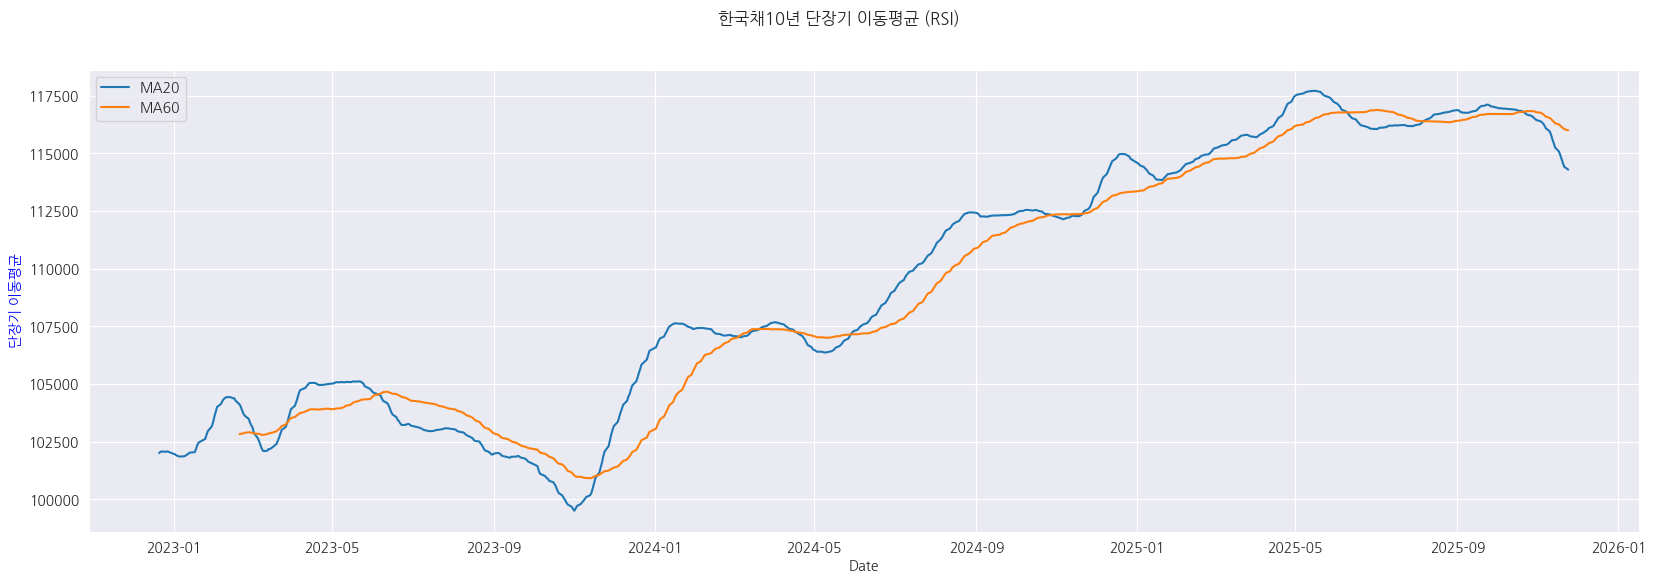

배당수익률: 0.0
PER: None
PBR: None


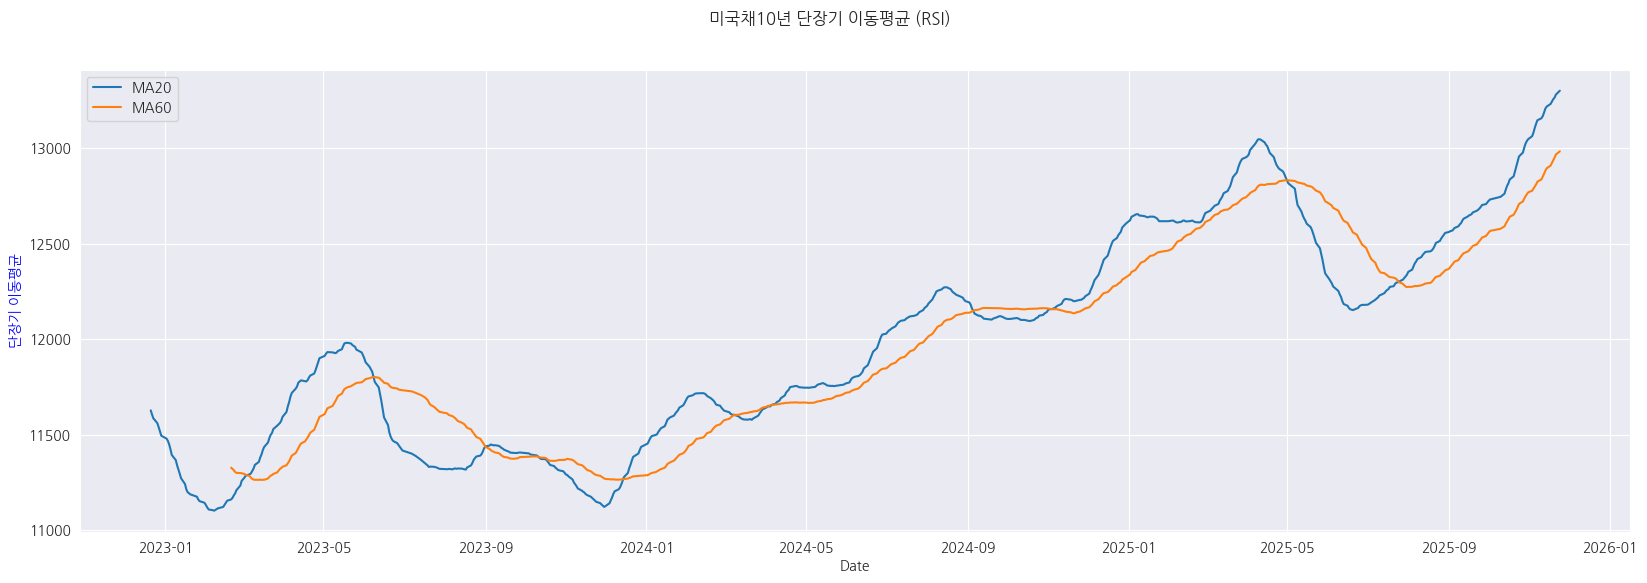

배당수익률: 0.01
PER: None
PBR: None


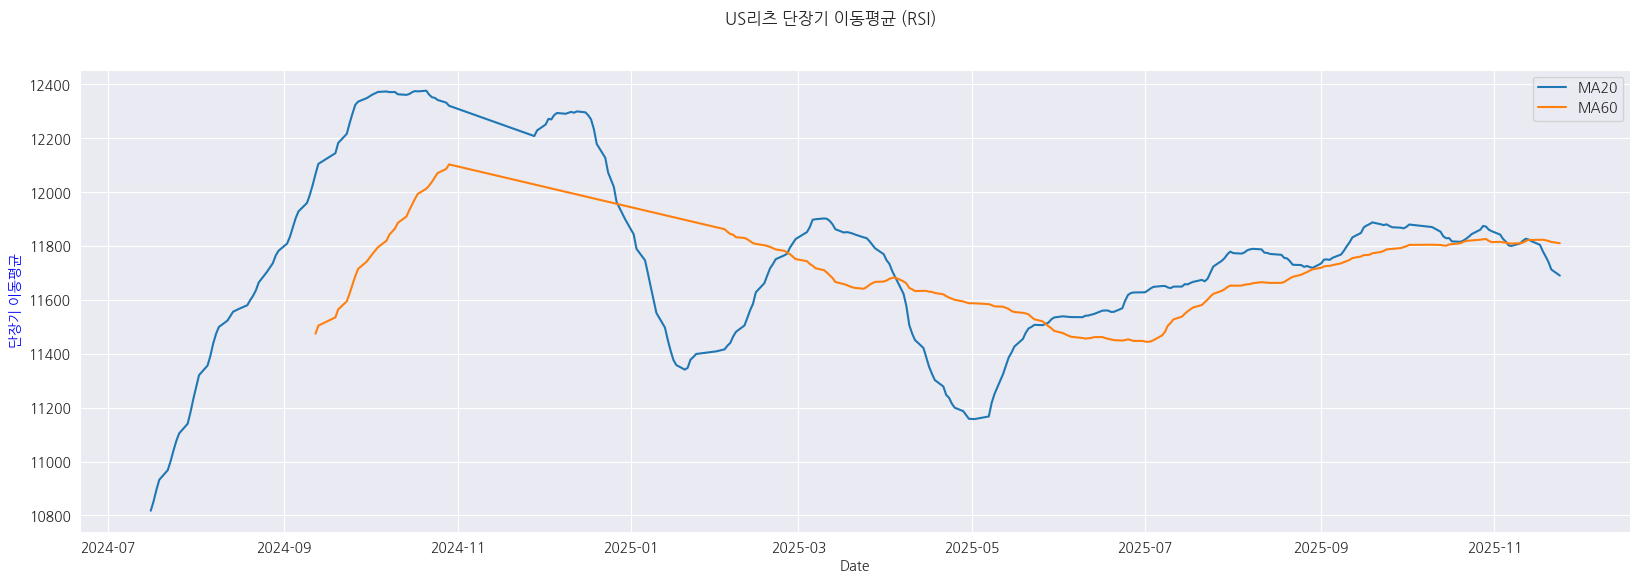

배당수익률: 0.0
PER: None
PBR: None


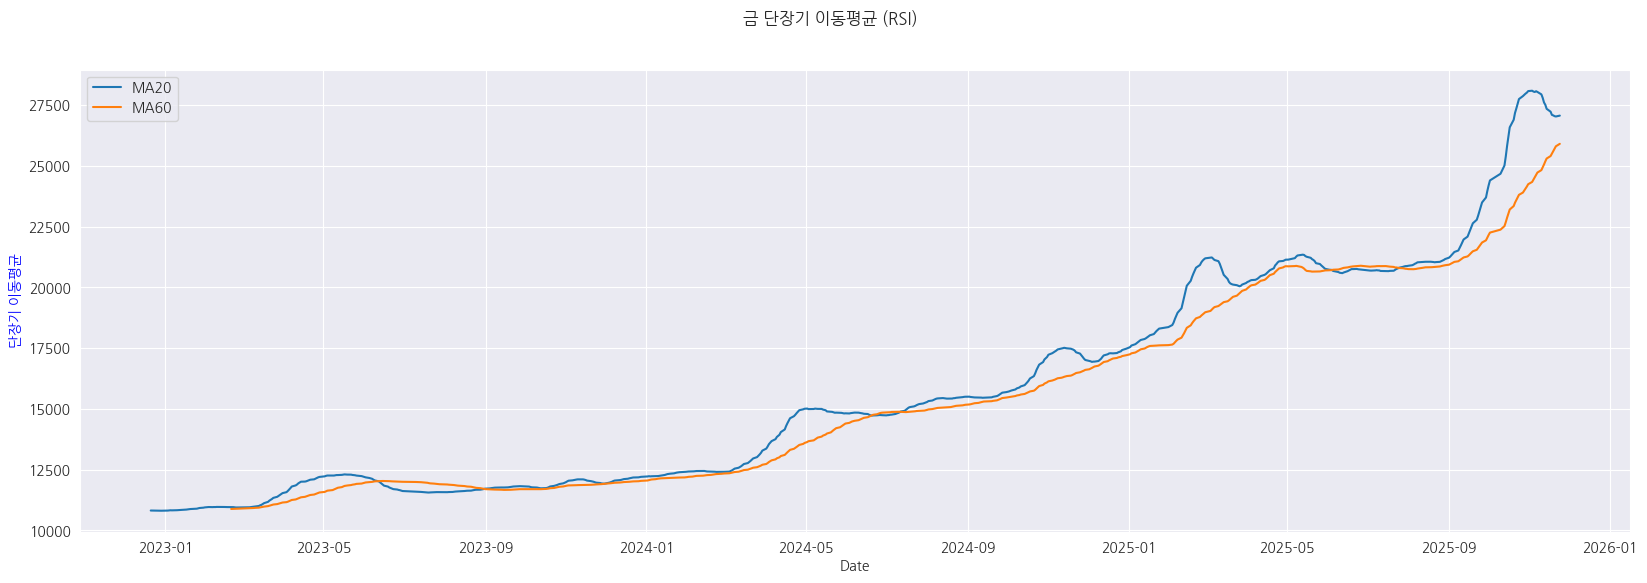

배당수익률: 0.0
PER: None
PBR: None


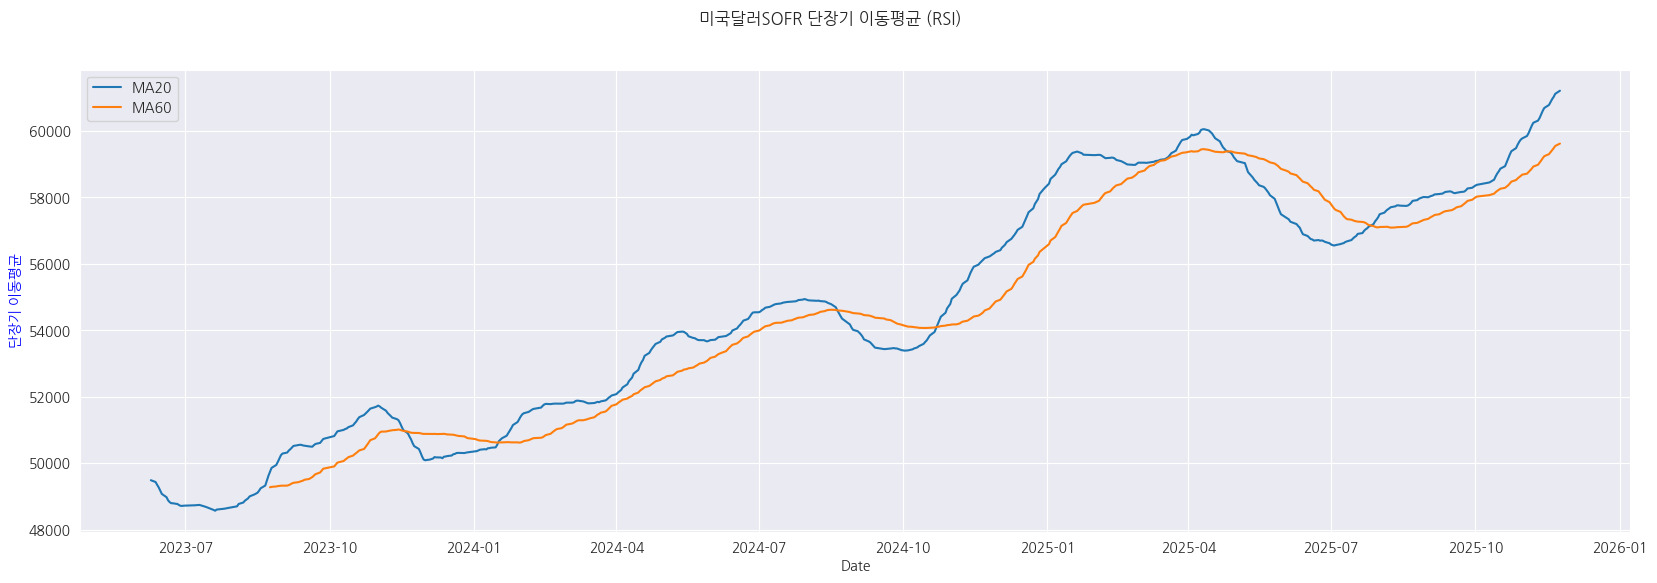

배당수익률: 0.0
PER: None
PBR: None


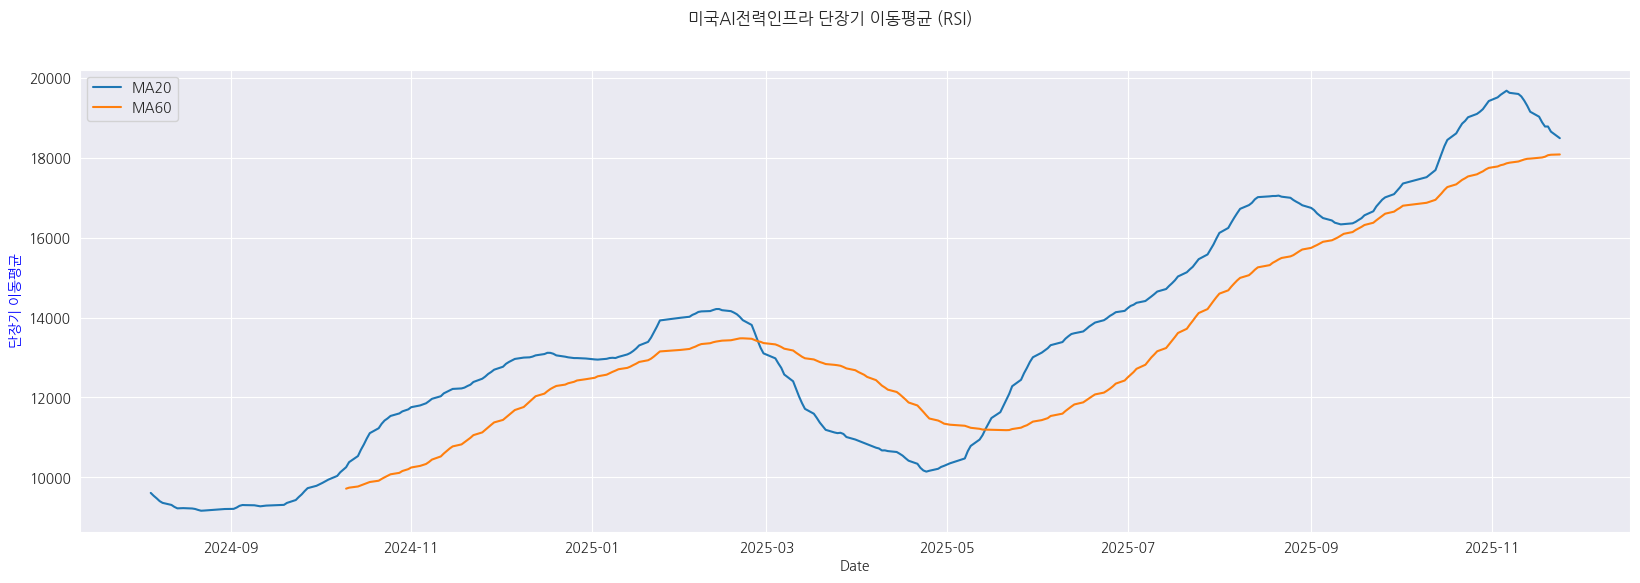

In [3]:
dict_tickers = {"360750.KS":"S&P500",  "446720.KS":"미국배당다우존스", "133690.KS":"미국나스닥100",
                "294400.KS":"키움200TR", "195980.KS":"MSCI",
                "272580.KS":"단기채권", "284430.KS":"KODEX미국채혼합", "490490.KS":"미국배당미국채혼합",
                "148070.KS":"한국채10년", "305080.KS":"미국채10년",
                "352560.KS":"US리츠", "411060.KS":"금", "456610.KS":"미국달러SOFR", "487230.KS":"미국AI전력인프라" }

for ticker in dict_tickers.keys():
    etf = yf.Ticker(ticker)

    # 2️⃣ 과거 주가 데이터 가져오기 (예: 3년치 일봉)
    df = etf.history(period="3y", interval="1d")
    df = df[['Close', 'Volume']]  # 종가, 거래량

    # 3️⃣ 이동평균선 계산
    df['MA20'] = df['Close'].rolling(20).mean()
    df['MA60'] = df['Close'].rolling(60).mean()
    df['volume_scaled'] = (df['Volume'] - df['Volume'].min()) / (df['Volume'].max() - df['Volume'].min()) * 100
    df['MA_volume'] = df['volume_scaled'].rolling(7).mean()

    # 4️⃣ RSI 계산 최근 14일(혹은 N일) 동안 상승폭/하락폭 평균 계산
    delta = df['Close'].diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    roll_up = up.rolling(14).mean()
    roll_down = down.rolling(14).mean()
    RS = roll_up / roll_down
    df['RSI'] = 100 - (100 / (1 + RS))

    # 5️⃣ 배당수익률 계산 (yfinance 제공)
    dividends = etf.dividends  # 배당금 시리즈
    # 최근 1년 배당 / 현재가
    latest_close = df['Close'].iloc[-1]
    annual_dividend = dividends[-4:].sum()  # 최근 4번 배당 가정
    div_yield = annual_dividend / latest_close
    print("배당수익률:",np.round(div_yield, 2) )

    # 6️⃣ PER/PBR 가져오기 (ETF는 주식처럼 재무제표 없음, 일부는 info로 가능)
    info = etf.info
    print("PER:", info.get('trailingPE'))
    print("PBR:", info.get('priceToBook'))


    fig, ax1 = plt.subplots(figsize=(20,6))
    sns.lineplot(x=df.index, y=df["MA20"], label='MA20')
    sns.lineplot(x=df.index, y=df["MA60"], label='MA60')
    ax1.set_ylabel('단장기 이동평균', color='blue')

    # ax2 = ax1.twinx()
    # sns.lineplot(x=df.index, y=df["RSI"], ax=ax2, label="RSI", color='red')
    # sns.lineplot(x=df.index, y=df["MA_volume"], ax=ax2, label="MA_volume", color='green')
    # ax2.set_ylabel('RSI', color='red')
    # ax2.set_yticks(range(0, 101, 10))

    fig.suptitle('{} 단장기 이동평균 (RSI)'.format(dict_tickers[ticker]))
    plt.show()

🔹 결론 (현 시점 기준)

💡 “이익 실현보다 리밸런싱을 유지”가 더 타당해 보입니다.

즉,
지금은 과매도 국면의 한국채·리츠를 다시 사기보다는
이미 분산한 금·S&P500·단기채 조합을 유지하면서
**금리방향 전환 신호(예: 10년물 금리 하락, 리츠 RSI 40 회복)**가 보일 때
다시 일부 비중을 회수하는 것이 합리적입니다.

---

- S&P500 (PER), tiger200 (pbr)
- https://www.gurufocus.com/economic_indicators/57/sp-500-pe-ratio
- https://data.krx.co.kr/contents/MMC/INDX/indx/MMCINDX002.cmd
- 데이터보다 사이트를 통해 확인바람

In [2]:
import yfinance as yf
import pandas as pd

# https://www.ssga.com/us/en/individual/etfs/spdr-sp-500-etf-trust-spy

# 1️⃣ S&P500 구성 종목 리스트 (예: SPY)
# 시가총액(market capitalization) = 주가 * 발행주식수
# PER = 주가 / 주가순이익(EPS) or 시가총액 / 순이익 ==>
# PER = 이 회사 이익 대비 주가가 얼마나 비싼가, PER이 20이면 현재 이익 수준에서 20년치 이익을 모아야 시가총액과 같아진다는 뜻
# PBR = 주가 / 주당순자산(BPS) or 시가총액 / 순자산 ==>
# PBR = 1 -> 회사의 순자산 가치와 시가총액이 같다, PBR < 1 -> 청산가치보다 싸게 거래 -> 저평가 가능성

df = pd.read_csv('holdings-daily-us-en-spy.csv', delimiter=',')
df = df[['Ticker', 'Weight']]

tickers = df['Ticker'].tolist()  # S&P500 종목 티커 리스트
weights = df['Weight'].tolist()
data = []

for t, w in zip(tickers, weights):
    try:
        stock = yf.Ticker(t)
        info = stock.info
        market_cap = info.get('marketCap')
        pe = info.get('trailingPE', None)  # per
        pb = info.get('priceToBook', None) # pbr
        div_yield = info.get('dividendYield')
        if pe is not None and market_cap is not None:
            data.append([t, w, market_cap, pe, pb, div_yield])
    except:
        continue

df = pd.DataFrame(data, columns=['Ticker', 'Weight', 'MarketCap','PE','PB','DivYield'])

# 시가총액 가중 평균 계산
df['Weight'] = df['MarketCap'] / df['MarketCap'].sum()  # Weight 재정규화
spy_per = (df['PE'] * df['Weight'] ).sum()
spy_pbr = (df['PB'] * df['Weight'] ).sum()

print(f"SPY 시가총액가중 PER: {spy_per:.2f}")
print(f"SPY 시가총액가중 PBR: {spy_pbr:.2f}")

SPY 시가총액가중 PER: 50.39
SPY 시가총액가중 PBR: 0.72


- 전환선(9일): 단기 추세
- 기준선(26일): 중기 추세
- 선행스팬1, 스팬2: 미래의 지지/저항 영역 (이 두 선 사이 영역이 ‘구름’)
- 구름이 초록색이면 상승세, 빨간색이면 하락세 가능성

✅ 후행스팬(Chikou Span, Lagging Span)이란?
- 정의: 종가를 26일 뒤로 시프트한 값
- 현재 가격이 과거 가격대 대비 높거나 낮은지를 보여줌
- 해석:
    + 팬이 과거의 가격 위에 있다 → 상승세(매수 우위)
    + 팬이 과거의 가격 아래 있다 → 하락세(매도 우위)

- 즉, 현재의 추세 강도를 시각적으로 확인하는 역할을 해요.


/var/folders/jk/1j1mgc7x11122bdp64mnjcf40000gp/T/ipykernel_83755/1011895887.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("005930.KS", start="2024-01-01", group_by="column")
[*********************100%***********************]  1 of 1 completed


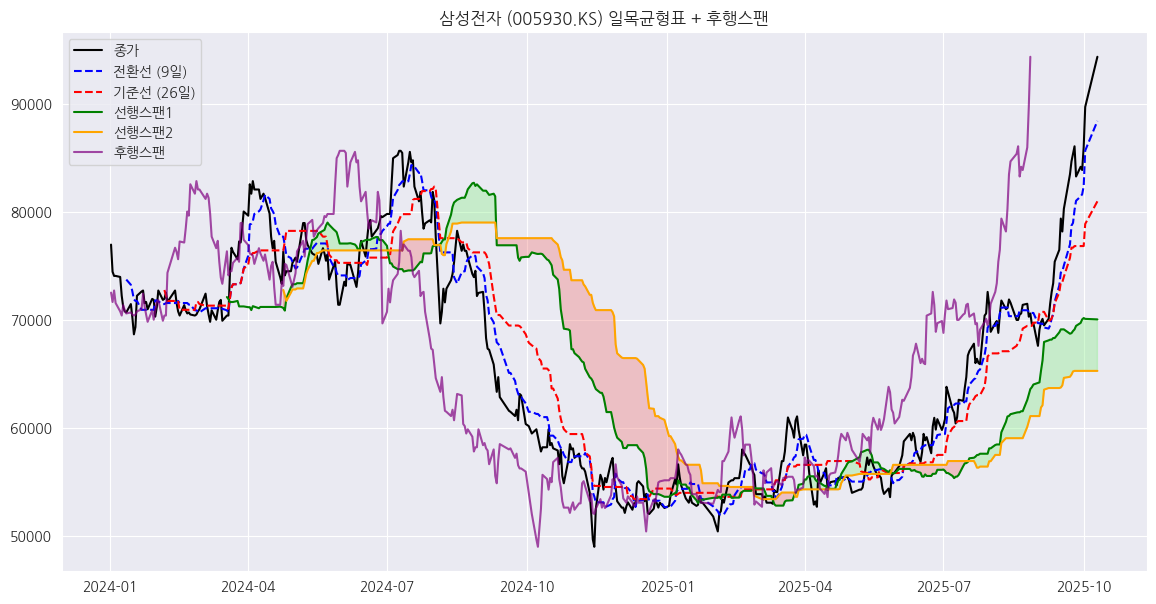

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 삼성전자 주가 데이터 (멀티인덱스 방지)
df = yf.download("005930.KS", start="2024-01-01", group_by="column")

# 혹시 멀티인덱스면 평탄화
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

# NaN 제거
df = df.dropna(subset=['High', 'Low', 'Close'])

# 전환선 (9일)
high_9 = df['High'].rolling(window=9).max()
low_9 = df['Low'].rolling(window=9).min()
conversion_line = (high_9 + low_9) / 2

# 기준선 (26일)
high_26 = df['High'].rolling(window=26).max()
low_26 = df['Low'].rolling(window=26).min()
base_line = (high_26 + low_26) / 2

# 선행스팬1, 선행스팬2
leading_span1 = ((conversion_line + base_line) / 2).shift(26)
high_52 = df['High'].rolling(window=52).max()
low_52 = df['Low'].rolling(window=52).min()
leading_span2 = ((high_52 + low_52) / 2).shift(26)

# ✅ 후행스팬 (현재 종가를 26일 과거로 이동)
lagging_span = df['Close'].shift(-26)

# 시각화
mask = (~leading_span1.isna()) & (~leading_span2.isna())
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'], label='종가', color='black')
plt.plot(df.index, conversion_line, label='전환선 (9일)', linestyle='--', color='blue')
plt.plot(df.index, base_line, label='기준선 (26일)', linestyle='--', color='red')
plt.plot(df.index, leading_span1, label='선행스팬1', color='green')
plt.plot(df.index, leading_span2, label='선행스팬2', color='orange')
plt.plot(df.index, lagging_span, label='후행스팬', color='purple', alpha=0.7)
plt.fill_between(df.index[mask], leading_span1[mask], leading_span2[mask],
                 where=leading_span1[mask] >= leading_span2[mask],
                 color='lightgreen', alpha=0.4)
plt.fill_between(df.index[mask], leading_span1[mask], leading_span2[mask],
                 where=leading_span1[mask] < leading_span2[mask],
                 color='lightcoral', alpha=0.4)
plt.title("삼성전자 (005930.KS) 일목균형표 + 후행스팬")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,
2024-01-02,76984.210938,77177.638603,75630.217278,75630.217278,17142847
2024-01-03,74469.656250,76210.505357,74469.656250,75920.363839,21753644
2024-01-04,74082.796875,74759.793713,73599.227705,73599.227705,15324439
2024-01-05,74082.796875,74566.366045,73889.369207,74179.510709,11304316
2024-01-08,73986.085938,74953.224316,73889.372100,74469.655127,11088724
